In [1]:
import pandas as pd
import numpy as np
import pickle

from ucimlrepo import fetch_ucirepo 

import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

from TopoTree import TopoTree, plot_hierarchical_treemap
from TopoMap import TopoMap

## Synthetic datasets

In [2]:
df_blobs = pd.read_csv('data/3blobs.csv')
data_blobs = df_blobs[['x','y','z']].values

topotree_blobs = TopoTree(data_blobs, min_box_size=0.05*data_blobs.shape[0])
comp_info_blobs = topotree_blobs.run()
df_comp_blobs = pd.DataFrame.from_dict(comp_info_blobs)

In [3]:
fig = plot_hierarchical_treemap(df_comp_blobs)
fig.update_layout(title='TopoTree - 3 Blobs Dataset')
fig.show()

In [4]:
df_rings = pd.read_csv('data/3rings.csv')
data_rings = df_rings[['x','y','z']].values

topotree_rings = TopoTree(data_rings, min_box_size=0.06*data_rings.shape[0])
comp_info_rings = topotree_rings.run()
df_comp_rings = pd.DataFrame.from_dict(comp_info_rings)

In [5]:
fig = plot_hierarchical_treemap(df_comp_rings)
fig.update_layout(title='TopoTree - 3 Rings Dataset')
fig.show()

In [6]:
fig.update_layout(title='title',
                  width=600, height=300,
                  margin = dict(t=0, l=0, r=0, b=0)
                  )
pio.write_image(fig, 'images/TopoTree3Rings.png', scale=10)

In [7]:
df_cavities = pd.read_csv('data/2cavities.csv')
df_cavities = df_cavities.rename(columns={'X':'x', 'Y':'y', 'Z':'z'})
data_cavities = df_cavities[['x','y','z']].values

topotree_cavities = TopoTree(data_cavities, min_box_size=0.06*data_cavities.shape[0])
comp_info_cavities = topotree_cavities.run()
df_comp_cavities = pd.DataFrame.from_dict(comp_info_cavities)

In [8]:
fig = plot_hierarchical_treemap(df_comp_cavities)
fig.update_layout(title='TopoTree - 2 Cavities Dataset')
fig.show()

## MFeat dataset

In [9]:
data_mfeat = pd.read_csv('data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X_mfeat = data_mfeat.drop(['class'], axis=1)

In [10]:
topotree = TopoTree(X_mfeat.to_numpy(), min_box_size=0.01*X_mfeat.shape[0])
comp_info_mfeat = topotree.run()

In [11]:
df_comp_mfeat = pd.DataFrame.from_dict(comp_info_mfeat)
df_comp_mfeat.head()

,id,points,size,persistence,created_at,children,parent,died_at,persistence_density
0,0,"[1475, 1479, 1543, 1481, 1488, 1554, 1555, 155...",32,0.504754,7.121154,5,2.0,7.625909,4.196221
1,1,"[1536, 1473, 1539, 1483, 1551, 1552, 1561, 143...",25,0.229002,7.396906,5,2.0,7.625909,3.278298
2,2,"[1536, 1409, 1408, 1539, 1415, 1543, 1547, 155...",178,2.713125,7.625909,66,10.0,10.339033,17.216310
3,3,"[274, 210, 340, 342, 279, 278, 214, 217, 349, ...",154,3.042566,9.170355,63,27.0,12.212921,12.609596
4,4,"[194, 133, 138, 140, 141, 80, 20, 150, 89, 154...",52,1.085822,9.300947,15,13.0,10.386769,5.006369


In [12]:
fig = plot_hierarchical_treemap(df_comp_mfeat)
fig.update_layout(title='TopoTree - MFeat Dataset')
fig.show()

In [13]:
pio.write_image(fig, 'images/TopoTree.png', scale=6, width=800, height=500)

## Iris dataset

In [14]:
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 

topotree = TopoTree(X.to_numpy(), min_box_size=0.05*X.shape[0])
comp_info_iris = topotree.run()

df_comp_iris = pd.DataFrame.from_dict(comp_info_iris)

In [15]:
fig = plot_hierarchical_treemap(df_comp_iris)
fig.update_layout(title='TopoTree - Iris dataset')
fig.show()

## LLM datasets - MMLU Test

In [16]:
questions_data = pd.read_csv('data/LLM/mmlu_val_questions_data.csv')
last_emb = pickle.load(open('data/LLM/mmlu_val_last_emb.pkl', 'rb'))

In [17]:
last_emb.shape

(1482, 4096)

In [18]:
topotree = TopoTree(last_emb, min_box_size=last_emb.shape[0]*0.005)
comp_info_llm = topotree.run()

df_comp_llm = pd.DataFrame.from_dict(comp_info_llm)

In [19]:
fig = plot_hierarchical_treemap(df_comp_llm)
fig.update_layout(title='TopoTree - LLM dataset')
fig.show()

In [20]:
topomap = TopoMap(last_emb)
proj_topomap_llm = topomap.run()

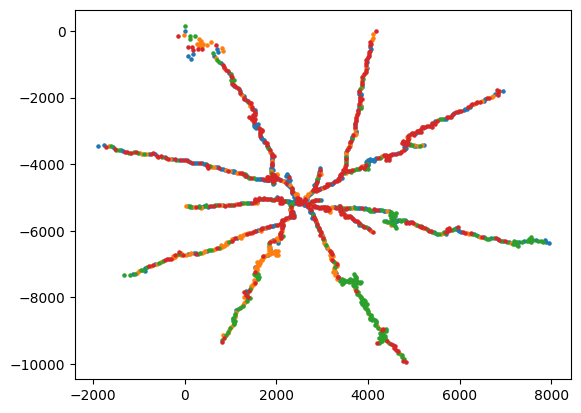

In [21]:
colors = colors = [px.colors.qualitative.D3[i] for i in range(10)]

for i, cluster in enumerate(questions_data['model_choice'].unique()):
    i_cluster = list(questions_data[questions_data['model_choice']==cluster].index)
    plt.scatter(proj_topomap_llm[i_cluster,0], proj_topomap_llm[i_cluster,1],
            c=colors[i], s=5)

## LLM datasets - Amazon

In [22]:
df_amazon = pd.read_csv('data/LLM/df_amazon.csv')
emb_amazon_all_layers = pickle.load(open('data/LLM/embeddings_amazon.pickle', 'rb'))
emb_amazon = np.array(list(emb_amazon_all_layers[32].values()))

In [23]:
emb_amazon.shape

(1800, 4096)

In [24]:
topotree = TopoTree(emb_amazon, min_box_size=emb_amazon.shape[0]*0.003)
comp_info_amazon = topotree.run()

df_comp_amazon = pd.DataFrame.from_dict(comp_info_amazon)

In [25]:
fig = plot_hierarchical_treemap(df_comp_amazon)
fig.update_layout(title='TopoTree - Amazon dataset')
fig.show()

In [26]:
topomap = TopoMap(emb_amazon)
proj_topomap_amazon = topomap.run()

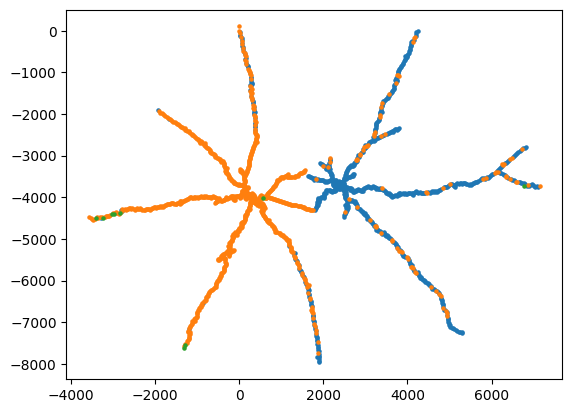

In [27]:
colors = colors = [px.colors.qualitative.D3[i] for i in range(10)]

for i, cluster in enumerate(df_amazon['model_choice'].unique()):
    i_cluster = list(df_amazon[df_amazon['model_choice']==cluster].index)
    plt.scatter(proj_topomap_amazon[i_cluster,0], proj_topomap_amazon[i_cluster,1],
            c=colors[i], s=5)